In [4]:
import requests
import pandas as pd

# Define the API endpoint and parameters
url = "https://api.fda.gov/food/enforcement.json?search=report_date:[20200101+TO+20240804]&limit=500"

# Send a GET request to the API
response = requests.get(url)


# Check if the request was successful
# if response.status_code == 200:
#     # Parse the JSON data
#     data = response.json()
    
#     # Extract the list of results (recalls)
#     recalls = data.get('results', [])
    
#     # Create a DataFrame from the list of recall records
#     recall_df = pd.DataFrame(recalls)
    
#     # Save the DataFrame to a CSV file
#     recall_df.to_csv('fda_food_enforcement_data.csv', index=False)

In [5]:
clean_df = recall_df.rename(columns={"status": "Status", 
                                     "city": "City",
                                     "state": "State",
                                     "country":"Country",
                                     "classification":"Classification",
                                     "openfda":"Open FDA",
                                     "product_type":"Product Type",
                                     "event_id":"Event ID",
                                     "recalling_firm":"Recalling Firm",
                                     "address_1":"Address 1",
                                     "address_2":"Address 2",
                                     "postal_code":"Postal Code",
                                     "voluntary_mandated":"Voluntary Mandated",
                                     "initial_firm_notification":"Initial Firm Notification",
                                     "distribution_pattern":"Distribution Pattern",
                                     "recall_number":"Recall Number",
                                     "product_description":"Product Description",
                                     "product_quantity":"Product Quantity",
                                     "reason_for_recall":"Reason for Recall",
                                     "recall_initiation_date":"Recall Initiation Date",
                                     "center_classification_date":"Center Classification Date",
                                     "termination_date":"Termination Date",
                                     "report_date":"Report Date",
                                     "code_info":"Code Info",
                                     "more_code_info":"More Code Info",
                                    
                                     })

clean_df

NameError: name 'recall_df' is not defined

In [ ]:
#Time it takes to close a recall - Manuel

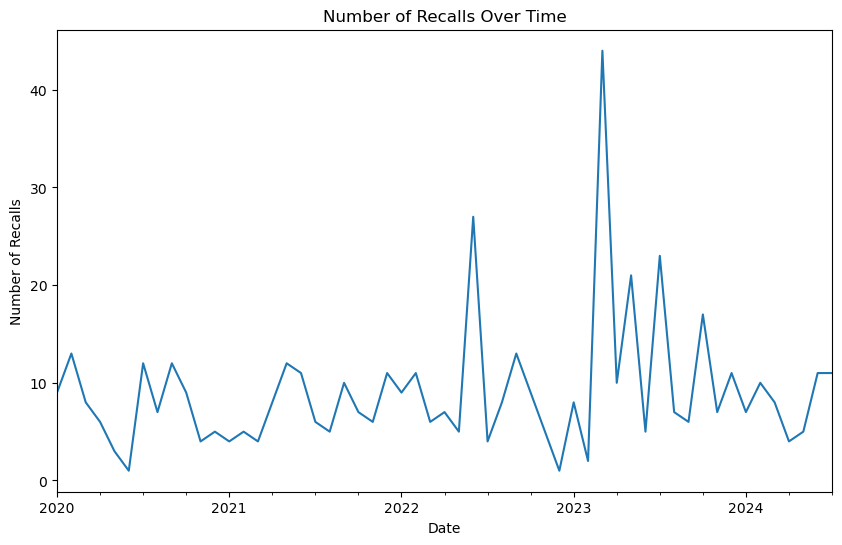

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('fda_food_enforcement_data.csv')

# Convert report_date to datetime format
df['report_date'] = pd.to_datetime(df['report_date'], format='%Y%m%d')

# Group by year and month, then count the number of recalls
recall_trends = df.groupby(df['report_date'].dt.to_period('M')).size()

# Plot the recall trends over time
recall_trends.plot(kind='line', figsize=(10, 6), title='Number of Recalls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Recalls')
plt.show()

In [7]:
# Load the dataset
clean_df = pd.read_csv('fda_food_enforcement_data.csv')

# Convert report_date to datetime format
clean_df['report_date'] = pd.to_datetime(clean_df['report_date'], format='%Y%m%d')

# Group by year and classification, then count the number of recalls
recall_trends_yearly = df.groupby([df['report_date'].dt.year, 'classification']).size().unstack(fill_value=0)
recall_trends_yearly

classification,Class I,Class II,Class III
report_date,,,
2020,29,52,8
2021,30,58,1
2022,62,40,3
2023,90,60,11
2024,18,36,2


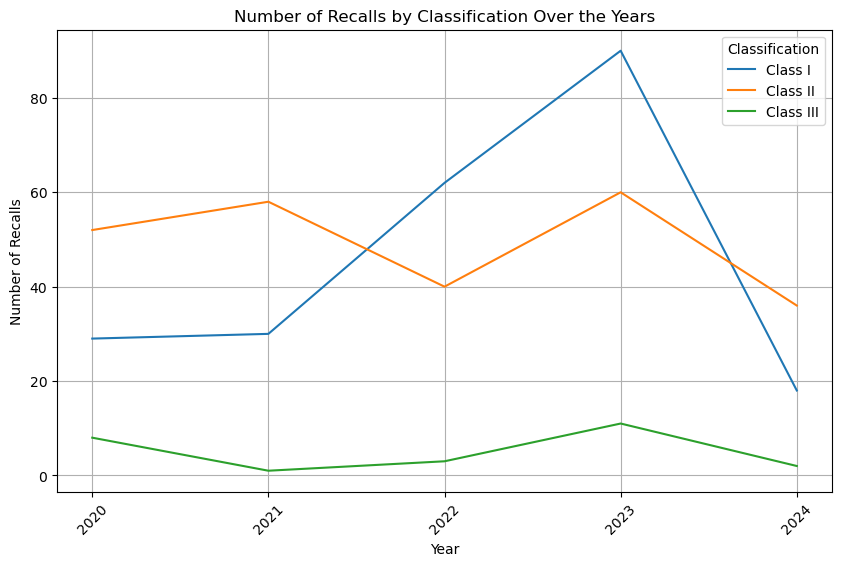

In [8]:
# Load the dataset
df = pd.read_csv('fda_food_enforcement_data.csv')

# Convert report_date to datetime format
df['report_date'] = pd.to_datetime(df['report_date'], format='%Y%m%d')

# Group by year and classification, then count the number of recalls
recall_trends_yearly = df.groupby([df['report_date'].dt.year, 'classification']).size().unstack(fill_value=0)

# Plot the recall trends over the years with different lines for each classification
plt.figure(figsize=(10, 6))
for classification in recall_trends_yearly.columns:
    plt.plot(recall_trends_yearly.index, recall_trends_yearly[classification], label=classification)

plt.title('Number of Recalls by Classification Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.xticks(recall_trends_yearly.index, rotation=45)
plt.legend(title='Classification')
plt.grid(True)
plt.savefig("output_data/Number of Recalls by Class.png")
plt.show()

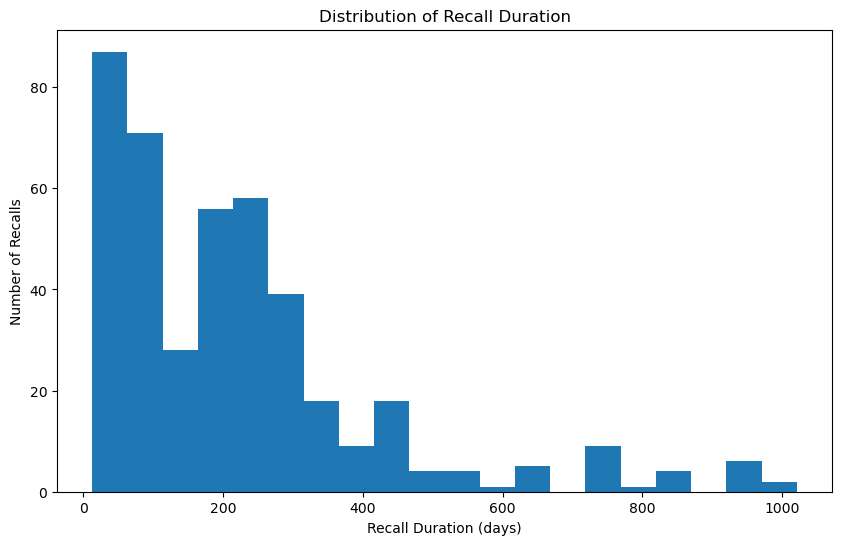

In [13]:
df['recall_initiation_date'] = pd.to_datetime(df['recall_initiation_date'], format='%Y%m%d')
df['termination_date'] = pd.to_datetime(df['termination_date'], format='%Y%m%d')

# Calculate the duration of each recall
df['recall_duration'] = (df['termination_date'] - df['recall_initiation_date']).dt.days

# Plot the distribution of recall durations
df['recall_duration'].plot(kind='hist', bins=20, figsize=(10, 6), title='Distribution of Recall Duration')
plt.xlabel('Recall Duration (days)')
plt.ylabel('Number of Recalls')
plt.savefig("output_data/Recall Duration_Combined.png")
plt.show()

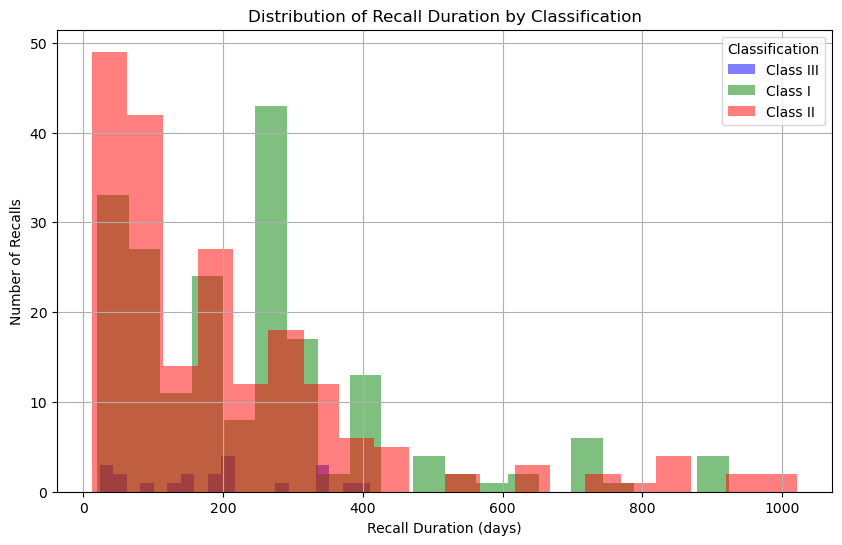

In [14]:
df['recall_initiation_date'] = pd.to_datetime(df['recall_initiation_date'], format='%Y%m%d')
df['termination_date'] = pd.to_datetime(df['termination_date'], format='%Y%m%d')

# Calculate the duration of each recall
df['recall_duration'] = (df['termination_date'] - df['recall_initiation_date']).dt.days

# Plot the distribution of recall durations by classification
plt.figure(figsize=(10, 6))

# Plot each classification with a different color
for classification, color in zip(df['classification'].unique(), ['blue', 'green', 'red']):
    subset = df[df['classification'] == classification]
    plt.hist(subset['recall_duration'].dropna(), bins=20, alpha=0.5, color=color, label=classification)

# Adding labels and title
plt.title('Distribution of Recall Duration by Classification')
plt.xlabel('Recall Duration (days)')
plt.ylabel('Number of Recalls')
plt.legend(title='Classification')
plt.grid(True)
plt.savefig("output_data/Recall Duration_Classification.png")
plt.show()

In [12]:
# Calculate the average recall duration by classification
average_recall_duration_by_classification = df.groupby('classification')['recall_duration'].mean()

# Convert the series to a DataFrame and reset the index
average_recall_duration_df = average_recall_duration_by_classification.reset_index()

# Rename the columns for clarity
average_recall_duration_df.columns = ['Classification', 'Average Recall Duration']

# Display the resulting DataFrame
print(average_recall_duration_df)

  Classification  Average Recall Duration
0        Class I               240.333333
1       Class II               207.791045
2      Class III               192.428571
